In [1]:
import numpy
import pandas

import seaborn
from matplotlib import pyplot

In [2]:
df = pandas.read_csv('data.csv')
df.columns = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price', 'cust_id','country']
df['invoice_date'] = df['invoice_date'].astype('datetime64[ns]')

cats = ['DOTCOM POSTAGE', 'CRUK Commission', 'Manual', 'POSTAGE']
df = df[~df['description'].isin(cats)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539360 entries, 0 to 541908
Data columns (total 8 columns):
invoice_no      539360 non-null object
stock_code      539360 non-null object
description     537906 non-null object
quantity        539360 non-null int64
invoice_date    539360 non-null datetime64[ns]
unit_price      539360 non-null float64
cust_id         405136 non-null float64
country         539360 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


In [3]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = df[df['cust_id'].isna() == False]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df['invoice_period'] = df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,invoice_period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [6]:
df.set_index('cust_id', inplace=True)
df['cohort_group'] = df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,invoice_period,cohort_group
cust_id,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12,2010-12


In [7]:
df.reset_index(inplace = True)
df.head()

,cust_id,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,invoice_period,cohort_group
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12,2010-12


In [8]:
aggregations = {
    'cust_id': pandas.Series.nunique,
    'description': pandas.Series.nunique,
    'quantity': numpy.sum
}

columns = {
    'cust_id': 'total_customers',
    'description': 'total_product_types',
    'quantity': 'total_units'
}

cohort = df.groupby(['cohort_group','invoice_period']).agg(aggregations)
cohort.rename(columns=columns, inplace=True)

cohort.head()

total_customers  total_product_types  total_units
cohort_group invoice_period                                                   
2010-12      2010-12                   948.0                 2427       295957
             2011-01                   361.0                 1833       158817
             2011-02                   316.0                 1719       137715
             2011-03                   366.0                 1868       179302
             2011-04                   340.0                 1792       130568

In [9]:
def cohort_period(dfc):
    dfc['cohort_period'] = numpy.arange(len(dfc)) + 1
    return dfc

cohort = cohort.groupby(level=0).apply(cohort_period)
cohort.head()

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                   948.0                 2427   
             2011-01                   361.0                 1833   
             2011-02                   316.0                 1719   
             2011-03                   366.0                 1868   
             2011-04                   340.0                 1792   

                             total_units  cohort_period  
cohort_group invoice_period                              
2010-12      2010-12              295957              1  
             2011-01              158817              2  
             2011-02              137715              3  
             2011-03              179302              4  
             2011-04              130568              5

Text(0.5,1,'Retention Rates Across Cohorts')

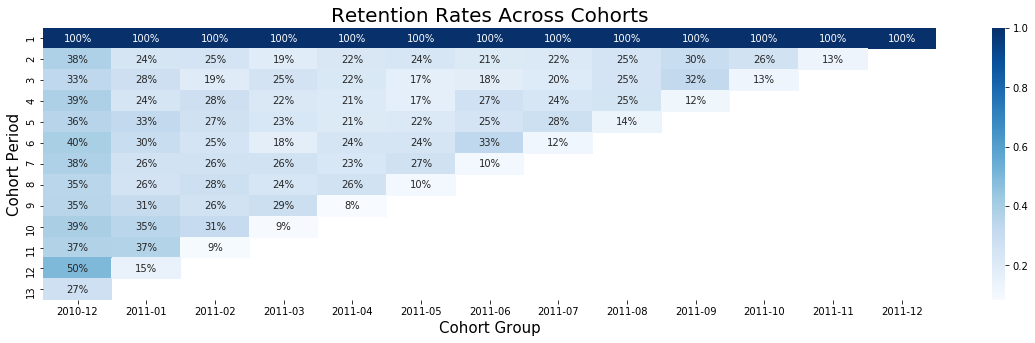

In [10]:
cohort.reset_index(inplace=True)
cohort.set_index(['cohort_group', 'cohort_period'], inplace=True)

cohort_sizes = cohort.groupby(level=0)['total_customers'].first()
user_retention = cohort['total_customers'].unstack(0).divide(cohort_sizes, axis=1)

pyplot.figure(figsize=(20,5))
ax = seaborn.heatmap(user_retention, annot=True, cmap='Blues', fmt='.0%')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Retention Rates Across Cohorts', fontsize = 20)